In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
from ortools.linear_solver import pywraplp
from ortools.sat.python import cp_model
model = cp_model.CpModel()
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import re
import copy
import random
import os
import time
#from ortools.graph.python import max_flow
from collections import Counter
import datetime as dt
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


from IPython.display import Latex

In [3]:
path = os.getcwd()
excel_filename = path + "/kaggle/input/data-14589/Distance_Matrix.csv"

In [12]:
def read_csv_to_matrix(file_path):
    df = pd.read_csv(file_path, header=None)
    # df.drop(['Unnamed: 0'], axis=1, inplace=True)
    matrix = df.values
    return matrix

In [13]:
dist_mat = pd.read_csv('../../data/dataset/Distance_Matrix.csv')
Biomass_history=pd.read_csv('../../data/dataset/Biomass_History.csv')
lat=Biomass_history['Latitude']
long=Biomass_history['Longitude']

In [14]:
Biomass_history

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885
...,...,...,...,...,...,...,...,...,...,...,...
2413,2413,20.15456,72.84432,5.199882,4.516778,4.321080,2.658953,5.113997,5.301668,6.419223,5.321604
2414,2414,20.15456,72.92394,0.122287,0.126717,0.101494,0.111509,0.121749,0.122467,0.145785,0.120626
2415,2415,20.15456,73.00357,0.039415,0.040843,0.032713,0.035941,0.039241,0.039473,0.046989,0.038879
2416,2416,20.15456,73.08319,2.719220,1.370163,0.818687,1.205721,1.316443,1.324201,1.576338,1.304297


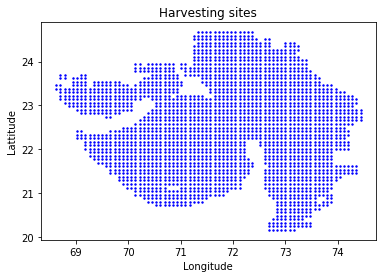

In [15]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(long, lat, color='blue', s=2)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('Harvesting sites')

# Show the plot
plt.show()

In [16]:
dist_mat

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417
0,0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
1,1,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
2,2,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
3,3,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
4,4,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,2413,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2414,2414,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2415,2415,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2416,2416,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


In [17]:
dist_mat.drop(['Unnamed: 0'], axis=1, inplace=True)

In [18]:
file_path = '../../data/dataset/Distance_Matrix.csv'
distance_matrix = read_csv_to_matrix(file_path)

In [19]:
# Convert the matrix to a DataFrame
df = pd.DataFrame(distance_matrix)

In [20]:
df


,0,1,2,3,4,5,6,7,8,9,...,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418
0,NaN,0.0000,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,...,2408.0000,2409.0000,2410.0000,2411.0000,2412.0000,2413.0000,2414.0000,2415.0000,2416.0000,2417.0000
1,0.0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
2,1.0,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
3,2.0,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
4,3.0,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,2413.0,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2415,2414.0,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2416,2415.0,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2417,2416.0,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


In [24]:
# Drop a row by index
index_to_drop = 0
df_dropped = df.drop(index_to_drop)
# Drop a column by label
column_to_drop = 0
df_dropped = df_dropped.drop(columns=column_to_drop)
df_dropped

,1,2,3,4,5,6,7,8,9,10,...,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418
1,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,113.4309,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
2,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,111.1832,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
3,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,111.7859,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
4,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,82.5852,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
5,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,65.1442,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,617.7221,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2415,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,609.9671,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2416,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,610.2964,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2417,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,617.5381,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


In [25]:
Dist= df_dropped
len(Dist)

2418

In [26]:
Dist

,1,2,3,4,5,6,7,8,9,10,...,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418
1,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,113.4309,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
2,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,111.1832,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
3,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,111.7859,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
4,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,82.5852,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
5,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,65.1442,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,617.7221,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2415,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,609.9671,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2416,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,610.2964,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2417,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,617.5381,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


In [27]:
Dist[8][1]

118.675

In [28]:
scale=1

num_harvesting_sites =len(Dist)
num_depots =len(Dist)
num_biorefs =len(Dist)

Harvesting_Site = range(num_harvesting_sites)
Depot = range(num_depots)
Refinery = range(num_biorefs)

ref_capacity=scale*100000
depot_capacity=scale*20000

In [29]:
Biomass_history['2017']

0         5.180296
1        42.126945
2        73.203232
3       101.067352
4        26.086885
           ...    
2413      5.321604
2414      0.120626
2415      0.038879
2416      1.304297
2417      0.226953
Name: 2017, Length: 2418, dtype: float64

In [30]:
forcast = pd.read_excel('../../outputs/Forecast_Output_v1.xlsx')

In [33]:
forcast['2019']

0        7.512659
1       31.925155
2       57.758351
3       77.864698
4       19.305664
          ...    
2413     5.121994
2414     0.123669
2415     0.039860
2416     1.611899
2417     0.309594
Name: 2019, Length: 2418, dtype: float64

In [34]:
scale=1  
### scaling will be required to get more accurate results as optimization model does not consider floating numbers

# forecasted_biomass = Biomass_history['2017']
forecasted_biomass = forcast['2019']
forecasted_biomass_scaled = scale*forecasted_biomass


total_forecasted_biomass_scaled=sum(forecasted_biomass_scaled)
total_forecasted_biomass_scaled

342729.6592616516

In [35]:
PC=[[] for i1  in Harvesting_Site]     #### Adjacency list for graph
IPC = [[] for i1  in Harvesting_Site]
for i1  in Harvesting_Site:
    for i2  in Harvesting_Site:
        if i1!=i2:
            if Dist[i1+1][i2+1]<=50:
                if Dist[i2+1][i1+1]<=50:
                    PC[i1].append(i2)  
                    IPC[i2].append(i1)

In [36]:
wt=[[] for i1  in Harvesting_Site ]
for i1  in Harvesting_Site:
    wt[i1]= (forecasted_biomass_scaled[i1])
    for i2 in PC[i1]:
        wt[i1]=wt[i1]+  forecasted_biomass_scaled[i2]      
max(wt),min(wt)

(25784.354286724916, 6.77145534224219)

In [37]:
model = cp_model.CpModel()

x = {}
y=  {}
bio={}
excess={}

for i  in Harvesting_Site:
    bio[i]= model.NewIntVar(0,99999999,'') 
    excess[i]= model.NewIntVar(0,99999999,'') 
    for j in PC[i]:
        x[i,j] = model.NewIntVar(0,1,'') 
    #y[i] = model.NewIntVar(0,1,'')
        
        
obj= model.NewIntVar(0,9999999999,'') 

In [38]:
for i  in Harvesting_Site: 
    for j in PC[i]:
            model.Add(x[i,j]+x[j,i]<=1) 

In [39]:
for i  in Harvesting_Site: 
    for j in PC[i]:
        model.Add(sum([x[j,k] for k in PC[j]])==0).OnlyEnforceIf(x[i,j])

In [40]:
for i  in Harvesting_Site:
    model.Add(sum([x[i,j] for j in IPC[i] ])<=1)

In [41]:
for i in Harvesting_Site:
    model.Add(bio[i]==sum([int(forecasted_biomass_scaled[j])*x[i,j] for j in PC[i]])+int(forecasted_biomass_scaled[i]))
    model.Add(bio[i]<=(depot_capacity))
    #model.Add(excess[i]==depot_capacity-bio[i])

In [42]:
# for i  in Harvesting_Site: 
#     for j in PC[i]:
#         model.Add(x[i,j]<=y[i])
#model.Add(obj==sum([excess[j] for j in Harvesting_Site  ]))
model.Add(obj==sum([x[i,j] for i in Harvesting_Site  for j in PC[i]]))

In [43]:
model.Maximize(obj)
import time
start_time_cp = time.perf_counter()
print()   
#db = model.NewSearchPhase(s, cp_model.INT_VAR_SIMPLE, cp_model.INT_VALUE_SIMPLE_ORDERED)
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 500
solver.parameters.num_search_workers = 8
solver.parameters.log_search_progress = True
status = solver.Solve(model)
print(solver.StatusName(status))

print("Time =", time.perf_counter() - start_time_cp, "seconds")
Time_cp = time.perf_counter() - start_time_cp


FEASIBLE
Time = 566.3577068 seconds


In [44]:
eliminated_locs =[]
cluster_reps = []
groupwise_locs = [[] for i  in Harvesting_Site]

cnt=0
for i  in Harvesting_Site:     
    for j in PC[i]:
        if solver.Value(x[i,j])>0:
            groupwise_locs[j].append(i)
            if j not in cluster_reps:
                cluster_reps.append(j)
            if i not in eliminated_locs:
                eliminated_locs.append(i)
groupwise_locs[1666]

[]

In [45]:
additional_locs=[]

for i  in Harvesting_Site: 
    if i not in eliminated_locs and i not in cluster_reps :
        print(i)
        additional_locs.append(i)
        cluster_reps.append(i)

415
667
1245
1538


In [46]:
len(set(eliminated_locs))

2258

In [47]:
print(cluster_reps)

[1, 47, 38, 27, 97, 82, 63, 66, 140, 170, 178, 158, 225, 137, 255, 231, 302, 329, 268, 314, 279, 370, 372, 375, 392, 234, 428, 488, 447, 401, 455, 459, 535, 494, 453, 457, 618, 524, 528, 601, 669, 675, 628, 710, 722, 662, 328, 483, 757, 704, 784, 815, 702, 794, 871, 892, 830, 899, 772, 916, 866, 948, 969, 981, 987, 1000, 1031, 1029, 1102, 1115, 1069, 1076, 1146, 1190, 1192, 1208, 1217, 1224, 1296, 1241, 1258, 1336, 1420, 1345, 1371, 1251, 1450, 1395, 1463, 1470, 1431, 1374, 1380, 1508, 1543, 1503, 1515, 1597, 1549, 1618, 1642, 1589, 1603, 1665, 1675, 1682, 1694, 1728, 1687, 1760, 1809, 1779, 1841, 1821, 1825, 1830, 1845, 1908, 1915, 1981, 1993, 2000, 1837, 2041, 2004, 2035, 2060, 2010, 2110, 2119, 2128, 2104, 2116, 2167, 2179, 2146, 2196, 2207, 2256, 2182, 2274, 2268, 2295, 2337, 2315, 2258, 2332, 2356, 2350, 2328, 2361, 2373, 2379, 2405, 2409, 2416, 415, 667, 1245, 1538]


In [48]:
#print(groupwise_locs)
Bio_fuel=[]
Groupwise_locs=[]
Cluster_reps = []

for i  in Harvesting_Site:   
    if len(groupwise_locs[i])>0:
        bio_fuel= forecasted_biomass_scaled[i]        
        for j in groupwise_locs[i]:
            bio_fuel=bio_fuel+ forecasted_biomass_scaled[j]
        Bio_fuel.append(bio_fuel)
        Groupwise_locs.append(groupwise_locs[i])
        Cluster_reps.append(i)
        print(i,groupwise_locs[i],bio_fuel)

1 [0, 4, 48] 140.33667841480354
27 [12, 13] 36.58383818567068
38 [5, 6, 7, 8, 9, 10, 11, 21, 22, 23, 24, 25, 26, 37, 39] 1129.4737055421815
47 [2, 3, 14, 15, 16, 17, 18, 29, 30] 586.4175817368557
63 [44, 45, 46, 61, 64] 52.704601917756946
66 [65, 87] 22.924569901851758
82 [28, 40, 41, 42, 43, 57, 58, 59, 60, 62, 79, 80, 83] 963.4736675255245
97 [19, 20, 31, 32, 33, 34, 35, 36, 49, 50, 51, 52, 53, 54, 55, 56, 72, 73, 74, 75, 76, 78, 95, 96, 98] 3250.5241785336916
137 [112, 113, 138] 55.325116541365674
140 [67, 88, 89, 90, 114, 115, 116, 141] 79.83864271456775
158 [81, 84, 85, 86, 103, 104, 105, 106, 107, 108, 109, 110, 132, 133, 134, 159] 1308.9545774339742
170 [68, 69, 70, 71, 91, 92, 93, 94, 117, 118, 119, 120, 121, 122, 142, 143, 144, 145, 146, 168, 171] 1482.731174410987
178 [77, 99, 100, 101, 102, 123, 125, 126, 127, 128, 129, 130, 131, 153, 154, 155, 156, 179] 2710.0689819668187
225 [111, 135, 136, 160, 161, 162, 163, 186, 187, 226] 676.8597882438722
231 [139, 164, 165, 166, 167, 

In [49]:
# dictionary of lists
dict = {'Cluster_reps':Cluster_reps,
        'Groupwise_locs': Groupwise_locs,
        'Total_bio_fuel': Bio_fuel}
df = pd.DataFrame(dict)
df

,Cluster_reps,Groupwise_locs,Total_bio_fuel
0,1,"[0, 4, 48]",140.336678
1,27,"[12, 13]",36.583838
2,38,"[5, 6, 7, 8, 9, 10, 11, 21, 22, 23, 24, 25, 26...",1129.473706
3,47,"[2, 3, 14, 15, 16, 17, 18, 29, 30]",586.417582
4,63,"[44, 45, 46, 61, 64]",52.704602
...,...,...,...
151,2373,"[2318, 2320, 2339, 2340, 2341, 2342, 2352, 235...",1177.987116
152,2379,"[2358, 2360, 2366, 2367, 2368, 2369, 2370, 237...",365.841795
153,2405,"[2375, 2376, 2381, 2382, 2384, 2389, 2390, 240...",513.081480
154,2409,"[2378, 2386, 2387, 2388, 2396, 2397, 2398, 239...",151.546483


In [50]:
Groups= [[] for i in range(len(Groupwise_locs)+len(additional_locs))]

for i in range(len(Groupwise_locs)):
    Groups[i].append(Cluster_reps[i])
    for j in Groupwise_locs[i]:
        Groups[i].append(j)

for i in range(len(additional_locs)):
    Groups[len(Groupwise_locs)+i].append(additional_locs[i])
print(Groups)

[[1, 0, 4, 48], [27, 12, 13], [38, 5, 6, 7, 8, 9, 10, 11, 21, 22, 23, 24, 25, 26, 37, 39], [47, 2, 3, 14, 15, 16, 17, 18, 29, 30], [63, 44, 45, 46, 61, 64], [66, 65, 87], [82, 28, 40, 41, 42, 43, 57, 58, 59, 60, 62, 79, 80, 83], [97, 19, 20, 31, 32, 33, 34, 35, 36, 49, 50, 51, 52, 53, 54, 55, 56, 72, 73, 74, 75, 76, 78, 95, 96, 98], [137, 112, 113, 138], [140, 67, 88, 89, 90, 114, 115, 116, 141], [158, 81, 84, 85, 86, 103, 104, 105, 106, 107, 108, 109, 110, 132, 133, 134, 159], [170, 68, 69, 70, 71, 91, 92, 93, 94, 117, 118, 119, 120, 121, 122, 142, 143, 144, 145, 146, 168, 171], [178, 77, 99, 100, 101, 102, 123, 125, 126, 127, 128, 129, 130, 131, 153, 154, 155, 156, 179], [225, 111, 135, 136, 160, 161, 162, 163, 186, 187, 226], [231, 139, 164, 165, 166, 167, 188, 192, 193, 194, 232], [234, 275], [255, 124, 147, 148, 149, 150, 151, 152, 172, 173, 174, 175, 176, 177, 213, 214, 215, 216, 256], [268, 189, 190, 191, 227, 228, 229, 230, 269], [279, 196, 197, 198, 199, 235, 236, 237, 238, 23

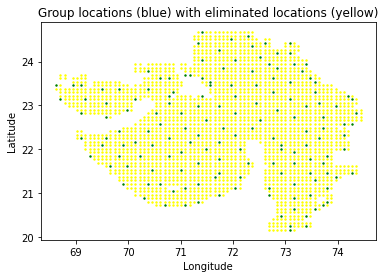

In [51]:
import matplotlib.pyplot as plt

# Create a scatter plot for selected cluster reference points
long_cr=[long[i] for i in Cluster_reps]
lat_cr=[lat[i] for i in Cluster_reps]

plt.scatter(long_cr, lat_cr, color='green', s=2)


# Create a scatter plot for eliminated points
long_el=[long[i] for i in eliminated_locs]
lat_el=[lat[i] for i in eliminated_locs]

plt.scatter(long_el, lat_el, color='yellow', s=2)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Group locations (blue) with eliminated locations (yellow)')

# Show the plot
plt.show()

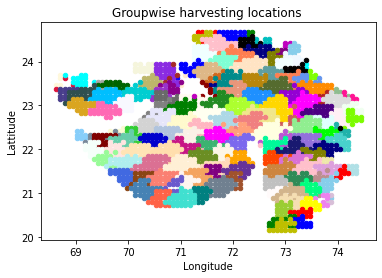

In [52]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


# use colormap
#colormap = ['r', 'g', 'b','y','c','m','k','pink','purple','skyblue','navy','azure','coral','olive']
colormap = ['r', 'g', 'b','y','c','m','k','pink','purple','skyblue','navy','azure','coral','olive',
    "AliceBlue", "Aqua", "Aquamarine", "Azure", "Beige", "Bisque", "Black",
    "BlanchedAlmond", "Blue", "BlueViolet", "Brown", "BurlyWood", "CadetBlue", "Chartreuse",
    "Chocolate", "Coral", "CornflowerBlue", "Cornsilk", "Crimson", "Cyan", "DarkBlue", "DarkCyan",
    "DarkGoldenRod", "DarkGray", "DarkGreen", "DarkKhaki", "DarkMagenta", "DarkOliveGreen",
    "DarkOrange", "DarkOrchid", "DarkRed", "DarkSalmon", "DarkSeaGreen", "DarkSlateBlue",
    "DarkSlateGray", "DarkTurquoise", "DarkViolet", "DeepPink", "DeepSkyBlue", "DimGray",
    "DodgerBlue", "FireBrick", "FloralWhite", "ForestGreen", "Fuchsia", "Gainsboro", "GhostWhite",
    "Gold", "GoldenRod", "Gray", "Green", "GreenYellow", "HoneyDew", "HotPink", "IndianRed",
    "Indigo", "Ivory", "Khaki", "Lavender", "LavenderBlush", "LawnGreen", "LemonChiffon",
    "LightBlue", "LightCoral", "LightCyan", "LightGoldenRodYellow", "LightGray", "LightGreen",
    "LightPink", "LightSalmon", "LightSeaGreen", "LightSkyBlue", "LightSlateGray", "LightSteelBlue",
    "LightYellow", "Lime", "LimeGreen", "Linen", "Magenta", "Maroon", "MediumAquaMarine",
    "MediumBlue", "MediumOrchid", "MediumPurple", "MediumSeaGreen", "MediumSlateBlue",
    "MediumSpringGreen", "MediumTurquoise", "MediumVioletRed", "MidnightBlue", "MintCream",
    "MistyRose", "Moccasin", "NavajoWhite", "Navy", "OldLace", "Olive", "OliveDrab", "Orange",
    "OrangeRed", "Orchid", "PaleGoldenRod", "PaleGreen", "PaleTurquoise", "PaleVioletRed",
    "PapayaWhip", "PeachPuff", "Peru", "Pink", "Plum", "PowderBlue", "Purple", "RebeccaPurple",
    "Red", "RosyBrown", "RoyalBlue", "SaddleBrown", "Salmon", "SandyBrown", "SeaGreen", "SeaShell",
    "Sienna", "Silver", "SkyBlue", "SlateBlue", "SlateGray", "Snow", "SpringGreen", "SteelBlue",
    "Tan", "Teal", "Thistle", "Tomato", "Turquoise", "Violet", "Wheat", 
    "Yellow", "YellowGreen"
]


for j in range(len(Groups)):
    long_temp=[long[i] for i in Groups[j]]
    lat_temp=[lat[i] for i in Groups[j]]
    plt.scatter(long_temp, lat_temp, color=colormap[j% len(colormap)], s=20)




# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('Groupwise harvesting locations ')

# Show the plot
plt.show()


In [53]:
Dist_groups = Dist
grouplen= len(Groups)

for i in range(grouplen):
    group_captain = Groups[i][0]
    
    #print(group_captain)
    for k in Harvesting_Site:        
            #print(sum([Dist[j+1][k+1] for j in Groups[i]]))
            Dist_groups[group_captain+1][k+1]=  sum([Dist[j+1][k+1] for j in Groups[i]])
    
        
    

In [54]:
groupwise_biofuel =[0 for i in Harvesting_Site]

for i in range(grouplen):
    group_captain = Groups[i][0]     
    #print(group_captain)
    groupwise_biofuel[group_captain]=sum([forecasted_biomass_scaled[j] for j in Groups[i]])        
#print(groupwise_biofuel)
Cluster_reps

[1,
 27,
 38,
 47,
 63,
 66,
 82,
 97,
 137,
 140,
 158,
 170,
 178,
 225,
 231,
 234,
 255,
 268,
 279,
 302,
 314,
 328,
 329,
 370,
 372,
 375,
 392,
 401,
 428,
 447,
 453,
 455,
 457,
 459,
 483,
 488,
 494,
 524,
 528,
 535,
 601,
 618,
 628,
 662,
 669,
 675,
 702,
 704,
 710,
 722,
 757,
 772,
 784,
 794,
 815,
 830,
 866,
 871,
 892,
 899,
 916,
 948,
 969,
 981,
 987,
 1000,
 1029,
 1031,
 1069,
 1076,
 1102,
 1115,
 1146,
 1190,
 1192,
 1208,
 1217,
 1224,
 1241,
 1251,
 1258,
 1296,
 1336,
 1345,
 1371,
 1374,
 1380,
 1395,
 1420,
 1431,
 1450,
 1463,
 1470,
 1503,
 1508,
 1515,
 1543,
 1549,
 1589,
 1597,
 1603,
 1618,
 1642,
 1665,
 1675,
 1682,
 1687,
 1694,
 1728,
 1760,
 1779,
 1809,
 1821,
 1825,
 1830,
 1837,
 1841,
 1845,
 1908,
 1915,
 1981,
 1993,
 2000,
 2004,
 2010,
 2035,
 2041,
 2060,
 2104,
 2110,
 2116,
 2119,
 2128,
 2146,
 2167,
 2179,
 2182,
 2196,
 2207,
 2256,
 2258,
 2268,
 2274,
 2295,
 2315,
 2328,
 2332,
 2337,
 2350,
 2356,
 2361,
 2373,
 2379,
 24

In [55]:
Harvesting_Site_Group=cluster_reps
Depot_Group = cluster_reps
Refinery_Group = cluster_reps

total_groupwise_biomass = sum(groupwise_biofuel)

large_number = 999999999
A=1000
B=1
C=1

In [56]:
model = cp_model.CpModel()


#### Biomass demand-supply flow varivale 
Biomass = {}
for i  in Harvesting_Site_Group:  
    for j in Depot_Group:        
        Biomass[i,j] = model.NewIntVar(0,int(groupwise_biofuel[i]),'depot_flow[%i,%i]' % (i, j))    ### C2 
        
#### Pellet transported  flow varivale        
Pellet =  {}
for j  in Depot_Group:  
    for k in Refinery_Group:        
        Pellet[j, k] = model.NewIntVar(0,depot_capacity,'refinary_flow[%i,%i]' % (j, k))  


      
 ###Three Objective variables

cost_transport =                model.NewIntVar(0,large_number,'cost_transport')
cost_transport_A =                model.NewIntVar(0,large_number,'cost_transport')
cost_transport_biomass =        model.NewIntVar(0,large_number,'cost_transport_biomass')
cost_transport_pellet =         model.NewIntVar(0,large_number,'cost_transport_pellet')
cost_forecast =                 model.NewIntVar(0,large_number,'cost_forecast')
cost_underutilization =         model.NewIntVar(0,large_number,'Cost_Underutilization')
cost=                           model.NewIntVar(0,large_number,'Cost')

In [57]:
#### Harvesting site- Depot binary varivale 
Site_Depot = {}
for i  in Harvesting_Site_Group:  
    for j in Depot_Group:        
        Site_Depot[i,j] = model.NewIntVar(0,1,'site_depot[%i,%i]' % (i, j))   
        
        
#### Pellet transported  flow varivale        
Depot_Refinery =  {}
for j  in Depot_Group:  
    for k in Refinery_Group:        
        Depot_Refinery[j, k] = model.NewIntVar(0,1,'depot_refinery[%i,%i]' % (j, k))

In [58]:
#### Depot selection binary variable
dp = {}
for j in Depot_Group:
    dp[j] = model.NewIntVar(0,1,'depot' ) 
    
    
#### Refinery selection binary variable
rf = {}
for j in Refinery_Group:
    rf[j] = model.NewIntVar(0,1,'refinery' )

In [59]:
for j in Depot_Group:
    model.Add(sum([Pellet[j,k] for k  in Refinery_Group])<=depot_capacity) 

In [60]:
for k in Refinery_Group:
    model.Add(sum([Pellet[j,k] for j  in Depot_Group])<=ref_capacity) 

In [61]:
model.Add(sum([Pellet[j,k] for j  in Depot_Group for k in Refinery_Group ])>= int(0.8*total_groupwise_biomass))

In [62]:
model.Add(sum([Biomass[i,j] for j  in Depot_Group for i in Harvesting_Site_Group ])<= int(total_groupwise_biomass))

In [63]:
for j in Depot_Group:
    model.Add(sum([Biomass[i,j] for i  in Harvesting_Site_Group])==sum([Pellet[j,k] for k  in Refinery_Group]))

In [64]:
for i  in Harvesting_Site_Group:  
    for j in Depot_Group:
        model.Add(Biomass[i,j]>0).OnlyEnforceIf(Site_Depot[i,j])
        model.Add(Biomass[i,j]==0).OnlyEnforceIf(Site_Depot[i,j].Not())
        #model.Add(z[i,j]<=dp[j])

In [65]:
for j  in Depot_Group:  
    for k in Refinery_Group:
        model.Add(Pellet[j,k]>0).OnlyEnforceIf(Depot_Refinery[j,k])
        model.Add(Pellet[j,k]==0).OnlyEnforceIf(Depot_Refinery[j,k].Not())
        #model.Add(z[i,j]<=dp[j])

In [66]:
model.Add(sum([dp[j] for j in Depot_Group])<=25)


In [67]:
model.Add(sum([rf[k] for k in Refinery_Group])<=5)

In [68]:
for j  in Depot_Group:  
    for k in Refinery_Group:        
        model.Add(Depot_Refinery[j,k]<=rf[k])
        #model.Add(Depot_Refinery[j,k]<=dp[j])
        
for i  in Harvesting_Site_Group:  
    for j in Depot_Group:
        model.Add(Site_Depot[i,j]<=dp[j])
        

In [69]:
model.Add(cost_transport_biomass==sum([int(Dist_groups[i+1][j+1])*Site_Depot[i,j]  for i  in Harvesting_Site_Group for j  in Depot_Group]))

In [70]:
model.Add(cost_transport_pellet==sum([int(Dist_groups[j+1][k+1])*Depot_Refinery[j,k]   for j  in Depot_Group for k  in Refinery_Group]))

In [71]:
model.Add(cost_transport==cost_transport_biomass+cost_transport_pellet)

In [72]:
model.Add(cost_underutilization==(25*depot_capacity-sum([Biomass[i,j] for i  in Harvesting_Site_Group for j in Depot_Group]))+(5*ref_capacity-sum([Pellet[j,k] for k  in Refinery_Group for j in Depot_Group])))

In [73]:
model.AddDivisionEquality(cost_transport_A,cost_transport,A)

In [74]:
model.Add(cost==cost_transport_A+B*cost_forecast+C*cost_underutilization)

In [75]:
model.Minimize(cost)

In [76]:
import time
start_time_cp = time.perf_counter()
print()   
#db = model.NewSearchPhase(s, cp_model.INT_VAR_SIMPLE, cp_model.INT_VALUE_SIMPLE_ORDERED)
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 600
solver.parameters.num_search_workers = 8
#solver.parameters.search_branching = 8
solver.parameters.log_search_progress = True
status = solver.Solve(model)
print(solver.StatusName(status))

print("Time =", time.perf_counter() - start_time_cp, "seconds")
Time_cp = time.perf_counter() - start_time_cp


FEASIBLE
Time = 607.7987140999999 seconds


In [77]:
print(solver.Value(cost))

314712


In [78]:
Final_depots = [j for j in Depot_Group if solver.Value(dp[j]) >0 ]
Final_refineries = [k for k in Refinery_Group if solver.Value(rf[k]) >0 ]
print(len(Final_depots), len(Final_refineries))

19 5


In [79]:
print('Depots:')
print(Final_depots)
print('\nRefineries:')
print(Final_refineries)

Depots:
[1, 47, 38, 27, 97, 82, 63, 66, 170, 225, 871, 830, 866, 987, 1217, 1760, 415, 667, 1538]

Refineries:
[1, 47, 38, 178, 1208]


In [80]:
print('Harvest_site_locs-->\tDepot\tDistance\tBiomass_flow')
print('-----------------------------')
for i  in Harvesting_Site_Group:    
        for j in Depot_Group:
            if solver.Value(Site_Depot[i,j])>0:
                print('%i\t\t\t%i\t%2.3f\t\t%i'%(i,j,Dist[i][j], solver.Value(Biomass[i,j])))

Harvest_site_locs-->	Depot	Distance	Biomass_flow
-----------------------------
97			47	140.066		3250
97			38	73.815		3250
97			27	85.399		3250
97			97	0.000		3250
170			47	182.832		1482
170			170	0.000		1482
178			38	85.261		2710
178			27	96.845		2710
178			82	58.148		2710
178			63	106.481		2710
255			1	121.708		2276
255			97	56.614		2276
302			38	120.696		4888
302			27	132.280		4888
302			97	106.710		4888
302			82	82.026		4888
302			63	89.611		4888
302			225	53.598		4888
268			66	117.358		1544
268			225	30.169		1544
392			82	119.066		3087
392			63	112.832		3087
392			66	130.416		3087
392			225	43.228		3087
428			170	83.347		967
488			47	173.668		4842
488			38	161.235		4842
488			97	104.840		4842
488			82	134.122		4842
488			63	153.434		4842
488			170	99.579		4842
447			66	151.406		1826
494			27	174.790		4450
494			82	116.416		4450
494			63	124.001		4450
494			225	76.462		4450
618			225	86.430		4834
675			1	201.543		4265
675			97	149.091		4265
483			1538	232.333		411
794			667	64.368		

In [81]:
print('Depot-->\tRefinery\tDistance\t Pellet_flow')
print('----------------------------------------------------------')
for j  in Depot_Group:  
    for k in Refinery_Group:
        if solver.Value(Depot_Refinery[j,k])>0:
            print('%i\t\t%i\t\t%2.3f\t\t%i' %(j,k,Dist[j][k], solver.Value(Pellet[j,k])))

Depot-->	Refinery	Distance	 Pellet_flow
----------------------------------------------------------
1		38		108.929		14731
47		1		175.180		17764
38		1		108.929		15690
27		1		120.513		15298
97		47		140.066		19521
82		38		63.233		19977
63		47		31.409		19977
66		47		43.319		6457
170		1		75.944		15962
225		1		172.844		18803
871		1208		117.697		19861
830		178		258.769		20000
866		178		195.877		20000
987		178		256.097		20000
1217		1208		92.746		19658
1760		38		431.110		19688
415		47		452.813		19572
667		178		217.332		20000
1538		1		360.469		16483
1538		178		298.876		3287


In [82]:
solver.Value(cost_underutilization)

314542

In [83]:
solver.Value(cost_transport_A)

170

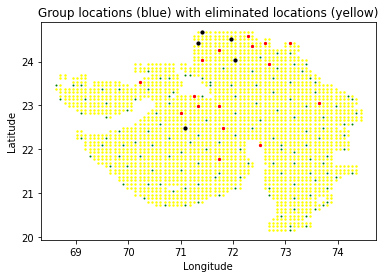

In [84]:
import matplotlib.pyplot as plt

# Create a scatter plot for selected cluster reference points
long_cr=[long[i] for i in Cluster_reps]
lat_cr=[lat[i] for i in Cluster_reps]

plt.scatter(long_cr, lat_cr, color='green', s=1)


# Create a scatter plot for eliminated points
long_el=[long[i] for i in eliminated_locs]
lat_el=[lat[i] for i in eliminated_locs]

plt.scatter(long_el, lat_el, color='yellow', s=2)


# Create a scatter plot for eliminated points
long_depot=[long[i] for i in Final_depots]
lat_depot=[lat[i] for i in Final_depots]

plt.scatter(long_depot, lat_depot, color='red', s=5)


# Create a scatter plot for eliminated points
long_ref=[long[i] for i in Final_refineries]
lat_ref=[lat[i] for i in Final_refineries]

plt.scatter(long_ref, lat_ref, color='black', s=10)



# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Group locations (blue) with eliminated locations (yellow)')

# Show the plot
plt.show()